# Experiment 2 – Precipitation Fall (next 3 days)
**Student ID:** 25506751  

## Objective
Build a regression model to predict the total precipitation (mm) for the next 3 days after a given date.


In [4]:
%pip install pandas numpy matplotlib seaborn scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/Users/oishik/Documents/AT2_submission/experimentation_repo/notebooks/dataset.csv")
df.head()


,date,dayofyear_sin,dayofyear_cos,precip_last_1,precip_last_3,precip_last_7,temp_max_mean_7,temp_min_mean_7,precip_hours_last_7,weathercode,will_rain_plus7,precip_next_3days
0,2023-01-01,0.017202,0.999852,10.293861,10.293861,10.293861,18.529584,5.323336,6,61,0,16.87
1,2023-01-02,0.034398,0.999408,0.000000,10.293861,10.293861,17.167908,4.973973,6,80,0,21.43
2,2023-01-03,0.051584,0.998669,13.354692,23.648553,23.648553,17.102202,4.723854,13,1,0,17.36
3,2023-01-04,0.068755,0.997634,3.516915,16.871607,27.165467,17.703014,4.664940,17,61,1,13.84
4,2023-01-05,0.085906,0.996303,4.557101,21.428708,31.722568,17.916828,4.288141,20,63,0,9.28


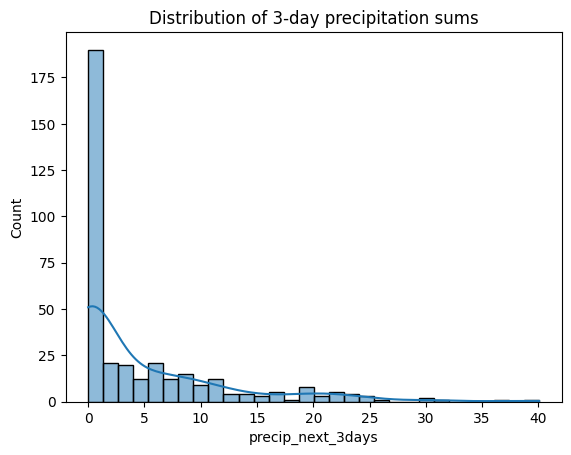

In [6]:
sns.histplot(df['precip_next_3days'], bins=30, kde=True)
plt.title('Distribution of 3-day precipitation sums')
plt.show()

In [7]:
FEATURE_COLS = [
    "dayofyear_sin","dayofyear_cos","precip_last_1","precip_last_3","precip_last_7",
    "temp_max_mean_7","temp_min_mean_7","precip_hours_last_7","weathercode"
]
X = df[FEATURE_COLS]
y = df['precip_next_3days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((286, 9), (72, 9))

In [8]:
reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, pred))
print("R2 :", r2_score(y_test, pred))


MSE: 45.24745985579861
R2 : 0.30626739394071756


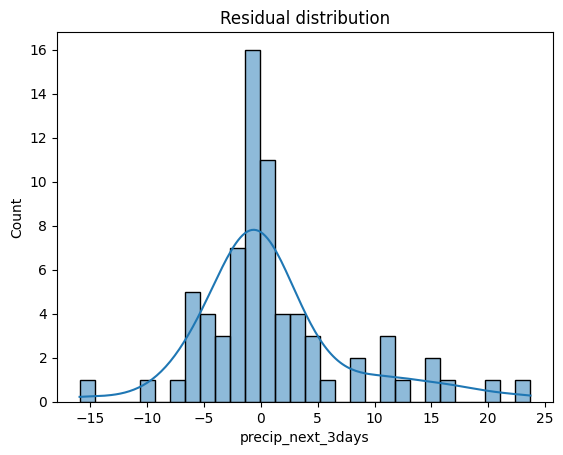

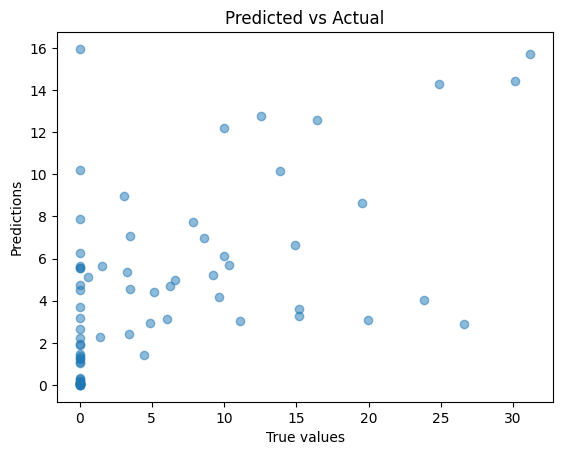

In [9]:
residuals = y_test - pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual distribution")
plt.show()

plt.scatter(y_test, pred, alpha=0.5)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.title("Predicted vs Actual")
plt.show()


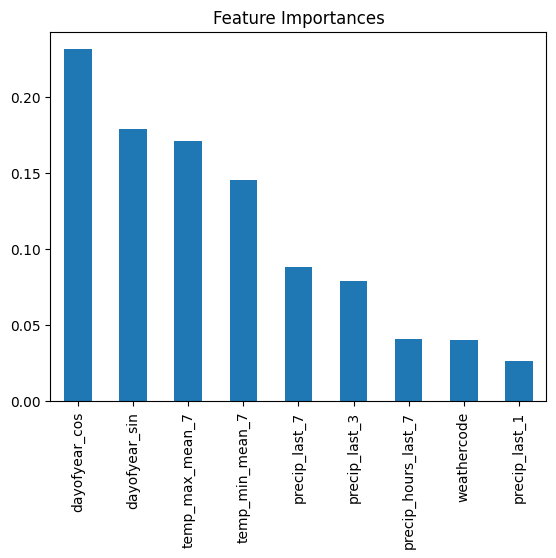

dayofyear_cos          0.231016
dayofyear_sin          0.178610
temp_max_mean_7        0.170846
temp_min_mean_7        0.145321
precip_last_7          0.087824
precip_last_3          0.079057
precip_hours_last_7    0.040913
weathercode            0.040131
precip_last_1          0.026282
dtype: float64

In [11]:
importances = pd.Series(reg.feature_importances_, index=FEATURE_COLS).sort_values(ascending=False)
importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()

importances


In [12]:
import joblib

# Save regressor into experimentation repo
joblib.dump(reg, "/Users/oishik/Documents/AT2_submission/experimentation_repo/models/precipitation_fall/precipitation_model.pkl")

# Also save a copy into API repo
joblib.dump(reg, "/Users/oishik/Documents/AT2_submission/experimentation_repo/api/precipitation_model.pkl")

print("Precipitation regressor model saved successfully!")


Precipitation regressor model saved successfully!


## Discussion
- MSE and R² quantify model performance; higher R² is better.
- Model captures general trends but extreme rainfall is harder to predict.
- Strong predictors: recent precipitation features and day-of-year seasonality.
- Improvements:
  - Try gradient boosting (XGBoost, LightGBM),
  - Add extra features (humidity, wind, soil moisture),
  - Perform cross-validation and hyperparameter tuning.
